In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import os
import numpy as np


In [7]:
os.chdir('/Users/be2297/Documents/Columbia/Research/Fulfillment/FulfillmentOptimization')
print(os.getcwd())

/Users/be2297/Documents/Columbia/Research/Fulfillment/FulfillmentOptimization


In [8]:
data = pd.read_csv('sm_lp_experiment_nsamples_500.csv')
data.head()

,graph_name,demand_model,weight_mode,total_inventory,train_greedy_performance,train_lp_performance,train_lp_benchmark,test_greedy_performance,test_lp_performance,test_lp_benchmark,l1_norm,off_lp_time,off_greedy_time
0,complete,deter,uniform,30,27.289833,27.302677,27.302677,27.315026,27.327260,27.327260,4,0.502485,10.928659
1,complete,deter,uniform,45,39.840488,39.840488,39.840488,39.876517,39.876517,39.878860,0,0.394474,19.724269
2,complete,deter,uniform,60,51.157306,51.157306,51.157306,51.199681,51.199681,51.199681,0,0.613494,34.434747
3,complete,deter,uniform,75,51.555651,51.555651,51.555651,51.594390,51.594390,51.594390,0,0.344032,53.446353
4,complete,deter,uniform,90,51.604357,51.604357,51.604357,51.640159,51.640159,51.641272,0,0.295729,45.295077


In [4]:
data['lp_compratio_train'] = data['train_lp_performance']/data['train_lp_benchmark']
data['greedy_compratio_train'] = data['train_greedy_performance']/data['train_lp_benchmark']

data['lp_compratio_test'] = data['test_lp_performance']/data['test_lp_benchmark']
data['greedy_compratio_test'] = data['test_greedy_performance']/data['test_lp_benchmark']

data['train_lp_over_greedy'] = data['train_lp_performance']/data['train_greedy_performance']
data['test_lp_over_greedy'] = data['test_lp_performance']/data['test_greedy_performance']

data['num_units_placed_differently'] = data['l1_norm']/2
data['percentage_units_placed_differently'] = data['num_units_placed_differently']/data['total_inventory']*100

data['time_ratio'] = data['off_greedy_time']/data['off_lp_time']

In [39]:
data

,graph_name,demand_model,weight_mode,total_inventory,train_greedy_performance,train_lp_performance,train_lp_benchmark,test_greedy_performance,test_lp_performance,test_lp_benchmark,...,off_lp_time,off_greedy_time,lp_compratio_train,greedy_compratio_train,lp_compratio_test,greedy_compratio_test,train_lp_over_greedy,test_lp_over_greedy,num_units_placed_differently,percentage_units_placed_differently
0,complete,deter,uniform,30,27.289833,27.302677,27.302677,27.315026,27.327260,27.327260,...,0.502485,10.928659,1.0,0.999530,1.000000,0.999552,1.000471,1.000448,2.0,6.666667
1,complete,deter,uniform,45,39.840488,39.840488,39.840488,39.876517,39.876517,39.878860,...,0.394474,19.724269,1.0,1.000000,0.999941,0.999941,1.000000,1.000000,0.0,0.000000
2,complete,deter,uniform,60,51.157306,51.157306,51.157306,51.199681,51.199681,51.199681,...,0.613494,34.434747,1.0,1.000000,1.000000,1.000000,1.000000,1.000000,0.0,0.000000
3,complete,deter,uniform,75,51.555651,51.555651,51.555651,51.594390,51.594390,51.594390,...,0.344032,53.446353,1.0,1.000000,1.000000,1.000000,1.000000,1.000000,0.0,0.000000
4,complete,deter,uniform,90,51.604357,51.604357,51.604357,51.640159,51.640159,51.641272,...,0.295729,45.295077,1.0,1.000000,0.999978,0.999978,1.000000,1.000000,0.0,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
85,starlike,correl,rewardbased,30,22.847074,22.879610,22.879610,22.572439,22.633564,22.633564,...,0.173865,1.906463,1.0,0.998578,1.000000,0.997299,1.001424,1.002708,1.0,3.333333
86,starlike,correl,rewardbased,45,30.816378,30.817671,30.817671,30.196882,30.233038,30.244091,...,0.145851,2.791119,1.0,0.999958,0.999635,0.998439,1.000042,1.001197,1.0,2.222222
87,starlike,correl,rewardbased,60,36.948209,36.982072,36.982072,35.824349,35.840548,35.859864,...,0.117820,4.110249,1.0,0.999084,0.999461,0.999010,1.000917,1.000452,1.0,1.666667
88,starlike,correl,rewardbased,75,41.845205,41.871323,41.871323,40.064260,40.059098,40.069946,...,0.114364,5.824964,1.0,0.999376,0.999729,0.999858,1.000624,0.999871,3.0,4.000000


<Axes: >

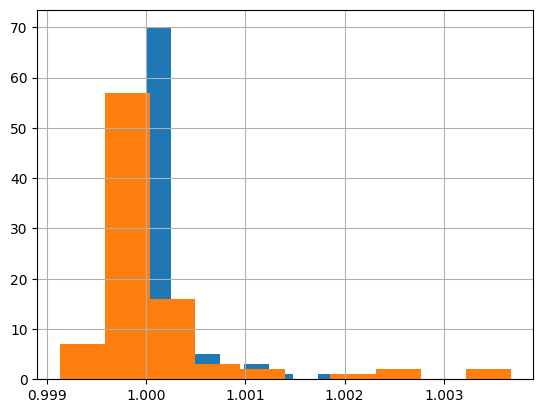

In [5]:
data['train_lp_over_greedy'].hist()
data['test_lp_over_greedy'].hist()


<Axes: >

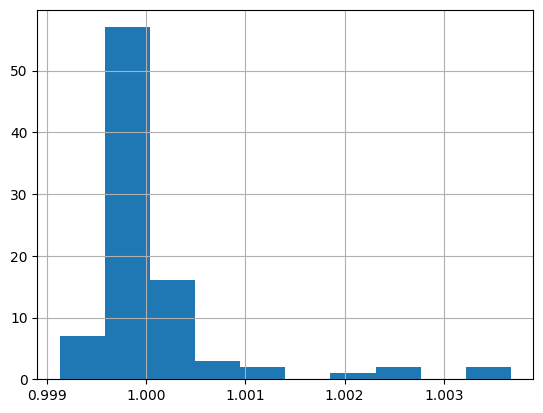

In [31]:
data['test_lp_over_greedy'].hist()

<Axes: >

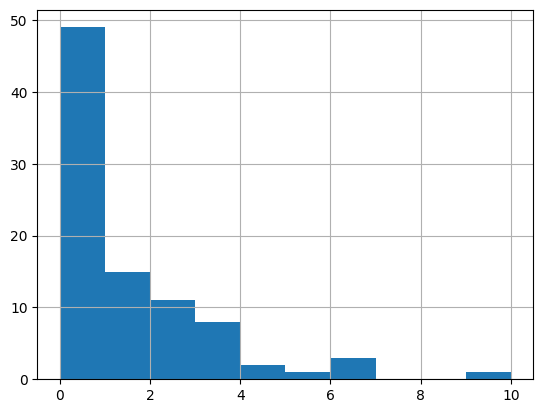

In [40]:
data['percentage_units_placed_differently'].hist()

<Axes: >

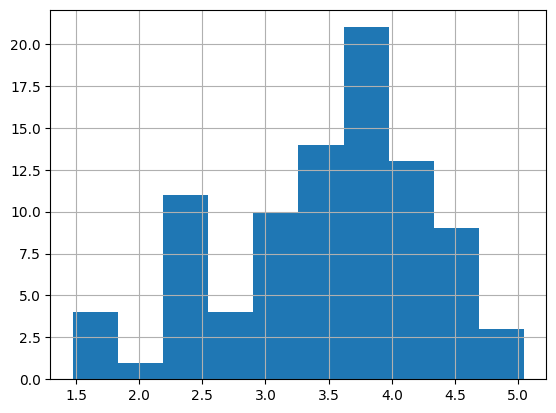

In [48]:
data['log_time_ratio'] = np.log(data['time_ratio'])
data['log_time_ratio'].hist()

In [49]:
len(data[data['time_ratio']<1])

0

In [92]:
np.mean(data['time_ratio'])

43.02815533112061

In [36]:
np.mean(data['percentage_units_placed_differently'])

0.01296296296296296

In [37]:
np.mean(data['num_units_placed_differently'])

0.6555555555555556

In [80]:
data[data['l1_norm']==6]


,graph_name,demand_model,weight_mode,total_inventory,train_greedy_performance,train_lp_performance,train_lp_benchmark,test_greedy_performance,test_lp_performance,test_lp_benchmark,...,lp_compratio_train,greedy_compratio_train,lp_compratio_test,greedy_compratio_test,train_lp_over_greedy,test_lp_over_greedy,num_units_placed_differently,percentage_units_placed_differently,time_ratio,log_time_ratio
75,starlike,indep,rewardbased,30,25.365217,25.427923,25.427923,24.81530,24.906472,24.912324,...,1.0,0.997534,0.999765,0.996105,1.002472,1.003674,3.0,10.0,9.649021,2.266856
88,starlike,correl,rewardbased,75,41.845205,41.871323,41.871323,40.06426,40.059098,40.069946,...,1.0,0.999376,0.999729,0.999858,1.000624,0.999871,3.0,4.0,50.933587,3.930523


In [41]:
pivot_percentage_units = pd.pivot_table(data, values='percentage_units_placed_differently', index = ['weight_mode', 'graph_name'], columns = ['demand_model'] )
pivot_percentage_units

In [43]:
pivot_perf_ratio_train = pd.pivot_table(data, values='train_lp_over_greedy', index = ['weight_mode', 'graph_name'], columns = ['demand_model'] )
pivot_perf_ratio_train

demand_model              correl     deter     indep
weight_mode graph_name                              
rewardbased complete    1.000000  1.000069  1.000000
            longchain   1.000070  1.000033  1.000000
            starlike    1.000634  1.000117  1.000890
uniform     complete    1.000007  1.000094  1.000001
            longchain   1.000016  1.000000  1.000000
            starlike    1.000603  1.000606  1.000803

In [44]:
pivot_perf_ratio_test = pd.pivot_table(data, values='test_lp_over_greedy', index = ['weight_mode', 'graph_name'], columns = ['demand_model'] )
pivot_perf_ratio_test

demand_model              correl     deter     indep
weight_mode graph_name                              
rewardbased complete    1.000000  1.000080  1.000000
            longchain   0.999837  1.000158  1.000000
            starlike    1.000863  0.999896  1.001278
uniform     complete    1.000034  1.000090  0.999994
            longchain   0.999523  1.000000  1.000000
            starlike    1.000517  0.999817  1.001493

In [83]:
(1/data['test_lp_over_greedy']).min()*100, (1/data['test_lp_over_greedy']).max()*100

(99.63394016499467, 100.08692547291815)

In [86]:
(1/data['train_lp_over_greedy']).min()*100

99.75339649153395

In [15]:
small_inventories_data = pd.read_csv('sm_lp_experiment_nsamples_500.csv')
small_inventories_data

,graph_name,demand_model,weight_mode,total_inventory,train_greedy_performance,train_lp_performance,train_lp_benchmark,test_greedy_performance,test_lp_performance,test_lp_benchmark,l1_norm,off_lp_time,off_greedy_time
0,complete,deter,uniform,30,27.289833,27.302677,27.302677,27.315026,27.327260,27.327260,4,0.502485,10.928659
1,complete,deter,uniform,45,39.840488,39.840488,39.840488,39.876517,39.876517,39.878860,0,0.394474,19.724269
2,complete,deter,uniform,60,51.157306,51.157306,51.157306,51.199681,51.199681,51.199681,0,0.613494,34.434747
3,complete,deter,uniform,75,51.555651,51.555651,51.555651,51.594390,51.594390,51.594390,0,0.344032,53.446353
4,complete,deter,uniform,90,51.604357,51.604357,51.604357,51.640159,51.640159,51.641272,0,0.295729,45.295077
...,...,...,...,...,...,...,...,...,...,...,...,...,...
85,starlike,correl,rewardbased,30,22.847074,22.879610,22.879610,22.572439,22.633564,22.633564,2,0.173865,1.906463
86,starlike,correl,rewardbased,45,30.816378,30.817671,30.817671,30.196882,30.233038,30.244091,2,0.145851,2.791119
87,starlike,correl,rewardbased,60,36.948209,36.982072,36.982072,35.824349,35.840548,35.859864,2,0.117820,4.110249
88,starlike,correl,rewardbased,75,41.845205,41.871323,41.871323,40.064260,40.059098,40.069946,6,0.114364,5.824964


<Axes: >

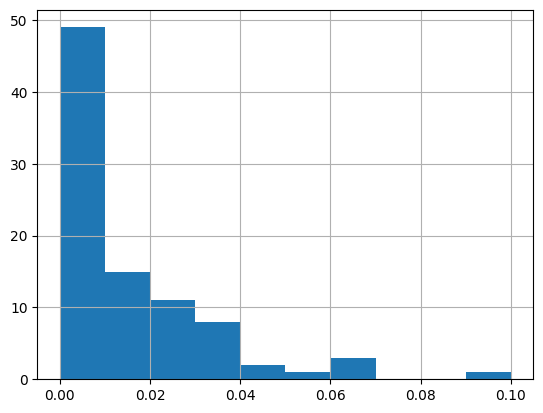

In [8]:
small_inventories_data['number_units_placed_differently']  = small_inventories_data['l1_norm']/2
small_inventories_data['percentage_placed_differently'] = small_inventories_data['number_units_placed_differently']/small_inventories_data['total_inventory']
small_inventories_data['percentage_placed_differently'].hist()

In [9]:
small_inventories_data[small_inventories_data['l1_norm']>0]

,graph_name,demand_model,weight_mode,total_inventory,train_greedy_performance,train_lp_performance,train_lp_benchmark,test_greedy_performance,test_lp_performance,test_lp_benchmark,l1_norm,off_lp_time,off_greedy_time,number_units_placed_differently,percentage_placed_differently
0,complete,deter,uniform,30,27.289833,27.302677,27.302677,27.315026,27.327260,27.327260,4,0.502485,10.928659,2.0,0.066667
5,complete,deter,rewardbased,30,27.455566,27.464656,27.464656,27.483958,27.494310,27.494310,4,0.421782,11.846939,2.0,0.066667
6,complete,deter,rewardbased,45,40.152418,40.152897,40.152897,40.196346,40.197205,40.197205,2,0.411044,18.191394,1.0,0.022222
13,complete,indep,uniform,75,48.478461,48.478592,48.478592,49.360264,49.358696,49.360264,2,0.394043,28.813144,1.0,0.013333
20,complete,correl,uniform,30,21.000013,21.000783,21.000783,20.685064,20.688627,20.689832,2,0.440164,11.486628,1.0,0.033333
35,longchain,deter,rewardbased,30,22.777379,22.778823,22.778823,22.696291,22.698873,22.707077,2,0.351089,1.939168,1.0,0.033333
37,longchain,deter,rewardbased,60,39.123383,39.127317,39.127317,38.977800,39.004108,39.004108,2,0.200644,4.184384,1.0,0.016667
51,longchain,correl,uniform,45,21.187216,21.187998,21.187998,20.578557,20.560684,20.578557,2,0.176376,3.296416,1.0,0.022222
52,longchain,correl,uniform,60,24.967372,24.967501,24.967501,24.035114,24.017520,24.040471,2,0.146302,4.207777,1.0,0.016667
53,longchain,correl,uniform,75,27.938324,27.939316,27.939316,26.643842,26.622904,26.648985,2,0.138517,5.160242,1.0,0.013333


<Axes: >

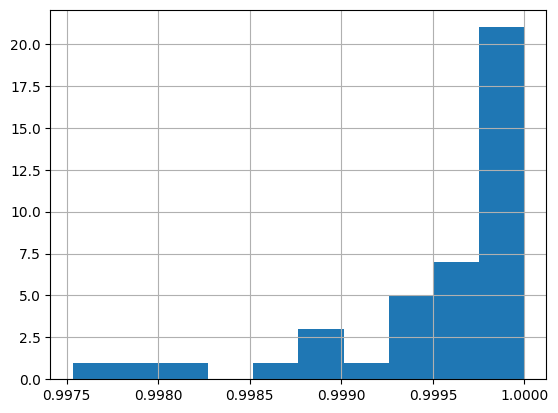

In [10]:
small_inventories_data['train_ratio'] = small_inventories_data['train_greedy_performance']/small_inventories_data['train_lp_performance']
small_inventories_data[small_inventories_data['l1_norm']>0]['train_ratio'].hist()

<Axes: >

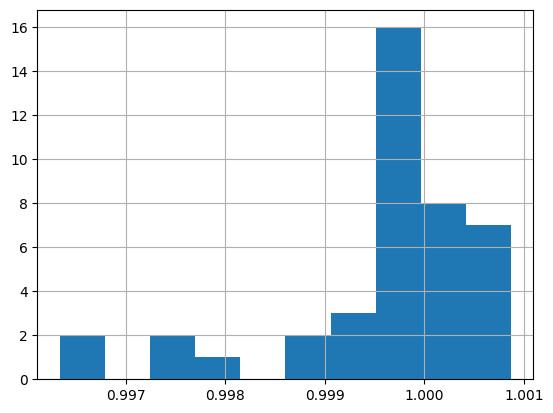

In [11]:
small_inventories_data['test_ratio'] = small_inventories_data['test_greedy_performance']/small_inventories_data['test_lp_performance']
small_inventories_data[small_inventories_data['l1_norm']>0]['test_ratio'].hist()

In [12]:
small_inventories_data[small_inventories_data['l1_norm']>0]

,graph_name,demand_model,weight_mode,total_inventory,train_greedy_performance,train_lp_performance,train_lp_benchmark,test_greedy_performance,test_lp_performance,test_lp_benchmark,l1_norm,off_lp_time,off_greedy_time,number_units_placed_differently,percentage_placed_differently,train_ratio,test_ratio
0,complete,deter,uniform,30,27.289833,27.302677,27.302677,27.315026,27.327260,27.327260,4,0.502485,10.928659,2.0,0.066667,0.999530,0.999552
5,complete,deter,rewardbased,30,27.455566,27.464656,27.464656,27.483958,27.494310,27.494310,4,0.421782,11.846939,2.0,0.066667,0.999669,0.999623
6,complete,deter,rewardbased,45,40.152418,40.152897,40.152897,40.196346,40.197205,40.197205,2,0.411044,18.191394,1.0,0.022222,0.999988,0.999979
13,complete,indep,uniform,75,48.478461,48.478592,48.478592,49.360264,49.358696,49.360264,2,0.394043,28.813144,1.0,0.013333,0.999997,1.000032
20,complete,correl,uniform,30,21.000013,21.000783,21.000783,20.685064,20.688627,20.689832,2,0.440164,11.486628,1.0,0.033333,0.999963,0.999828
35,longchain,deter,rewardbased,30,22.777379,22.778823,22.778823,22.696291,22.698873,22.707077,2,0.351089,1.939168,1.0,0.033333,0.999937,0.999886
37,longchain,deter,rewardbased,60,39.123383,39.127317,39.127317,38.977800,39.004108,39.004108,2,0.200644,4.184384,1.0,0.016667,0.999899,0.999326
51,longchain,correl,uniform,45,21.187216,21.187998,21.187998,20.578557,20.560684,20.578557,2,0.176376,3.296416,1.0,0.022222,0.999963,1.000869
52,longchain,correl,uniform,60,24.967372,24.967501,24.967501,24.035114,24.017520,24.040471,2,0.146302,4.207777,1.0,0.016667,0.999995,1.000733
53,longchain,correl,uniform,75,27.938324,27.939316,27.939316,26.643842,26.622904,26.648985,2,0.138517,5.160242,1.0,0.013333,0.999965,1.000786


In [13]:
large_inventories_data = pd.read_csv('sm_lp_experiment_nsamples_500.csv')
large_inventories_data

,graph_name,demand_model,weight_mode,total_inventory,train_greedy_performance,train_lp_performance,train_lp_benchmark,test_greedy_performance,test_lp_performance,test_lp_benchmark,l1_norm,off_lp_time,off_greedy_time
0,complete,deter,uniform,30,27.289833,27.302677,27.302677,27.315026,27.327260,27.327260,4,0.502485,10.928659
1,complete,deter,uniform,45,39.840488,39.840488,39.840488,39.876517,39.876517,39.878860,0,0.394474,19.724269
2,complete,deter,uniform,60,51.157306,51.157306,51.157306,51.199681,51.199681,51.199681,0,0.613494,34.434747
3,complete,deter,uniform,75,51.555651,51.555651,51.555651,51.594390,51.594390,51.594390,0,0.344032,53.446353
4,complete,deter,uniform,90,51.604357,51.604357,51.604357,51.640159,51.640159,51.641272,0,0.295729,45.295077
...,...,...,...,...,...,...,...,...,...,...,...,...,...
85,starlike,correl,rewardbased,30,22.847074,22.879610,22.879610,22.572439,22.633564,22.633564,2,0.173865,1.906463
86,starlike,correl,rewardbased,45,30.816378,30.817671,30.817671,30.196882,30.233038,30.244091,2,0.145851,2.791119
87,starlike,correl,rewardbased,60,36.948209,36.982072,36.982072,35.824349,35.840548,35.859864,2,0.117820,4.110249
88,starlike,correl,rewardbased,75,41.845205,41.871323,41.871323,40.064260,40.059098,40.069946,6,0.114364,5.824964


<Axes: >

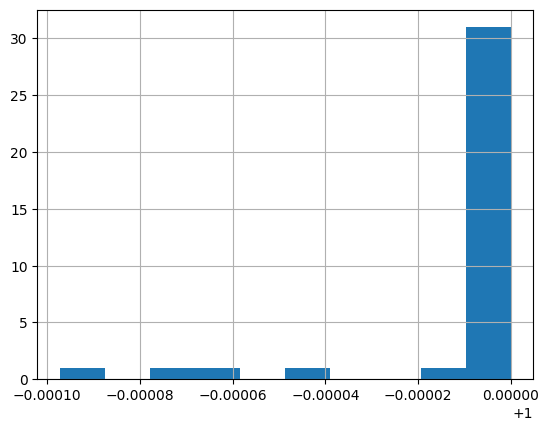

In [42]:
large_inventories_data['train_ratio'] = large_inventories_data['train_greedy_performance']/large_inventories_data['train_lp_performance']
large_inventories_data['test_ratio'] = large_inventories_data['test_greedy_performance']/large_inventories_data['test_lp_performance']

large_inventories_data['train_ratio'].hist()

In [40]:
large_inventories_data[large_inventories_data['train_ratio']<1]['train_ratio']

0     0.999903
1     0.999937
3     0.999923
4     0.999982
7     0.999998
17    0.999999
25    0.999997
33    0.999997
34    0.999958
Name: train_ratio, dtype: float64

In [14]:
large_inventories_data[large_inventories_data['l1_norm']>0]

,graph_name,demand_model,weight_mode,total_inventory,train_greedy_performance,train_lp_performance,train_lp_benchmark,test_greedy_performance,test_lp_performance,test_lp_benchmark,l1_norm,off_lp_time,off_greedy_time
0,complete,deter,uniform,30,27.289833,27.302677,27.302677,27.315026,27.327260,27.327260,4,0.502485,10.928659
5,complete,deter,rewardbased,30,27.455566,27.464656,27.464656,27.483958,27.494310,27.494310,4,0.421782,11.846939
6,complete,deter,rewardbased,45,40.152418,40.152897,40.152897,40.196346,40.197205,40.197205,2,0.411044,18.191394
13,complete,indep,uniform,75,48.478461,48.478592,48.478592,49.360264,49.358696,49.360264,2,0.394043,28.813144
20,complete,correl,uniform,30,21.000013,21.000783,21.000783,20.685064,20.688627,20.689832,2,0.440164,11.486628
35,longchain,deter,rewardbased,30,22.777379,22.778823,22.778823,22.696291,22.698873,22.707077,2,0.351089,1.939168
37,longchain,deter,rewardbased,60,39.123383,39.127317,39.127317,38.977800,39.004108,39.004108,2,0.200644,4.184384
51,longchain,correl,uniform,45,21.187216,21.187998,21.187998,20.578557,20.560684,20.578557,2,0.176376,3.296416
52,longchain,correl,uniform,60,24.967372,24.967501,24.967501,24.035114,24.017520,24.040471,2,0.146302,4.207777
53,longchain,correl,uniform,75,27.938324,27.939316,27.939316,26.643842,26.622904,26.648985,2,0.138517,5.160242
